In [1]:
from dbanalysis import stop_tools
import pandas as pd
df = stop_tools.random_stop_data()

In [5]:
df['hour'].unique()

array([ 6,  7,  9,  8, 20, 13, 18, 17,  5, 16, 10, 22, 15, 19, 23, 14, 21,
       11, 12])

In [9]:
to_concat = []
for hour in df['hour'].unique():
    temp = df[df['hour']==hour]
    temp['mean_travel_time']=temp['traveltime'].mean()
    to_concat.append(temp)
df=pd.concat(to_concat,axis=0)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
df

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,...,hour,year,dewpt,msl,rain,rhum,temp,vappr,wetb,mean_travel_time
0,21,03-JAN-17 00:00:00,4086708,23431,23431,23453,23453,23500,23484,41C_80,...,6,2017,0.4,1031.8,0.0,94,1.2,6.3,0.9,35.921550
1,1785,03-JAN-17 00:00:00,4086713,24631,24631,24798,24798,24700,24827,41C_80,...,6,2017,0.4,1031.8,0.0,94,1.2,6.3,0.9,35.921550
2,61,04-JAN-17 00:00:00,4086708,23431,23431,23460,23468,23500,23508,41C_80,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
3,1825,04-JAN-17 00:00:00,4086713,24631,24631,24711,24718,24700,24757,41C_80,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
4,10587,04-JAN-17 00:00:00,4087032,24594,24594,24077,24077,24650,24099,41_7,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
5,14103,04-JAN-17 00:00:00,4087041,23694,23694,23482,23482,23750,23513,41_7,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
6,22325,04-JAN-17 00:00:00,4087080,25194,25194,25031,25031,25250,25063,41_7,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
7,4920,04-JAN-17 00:00:00,4089480,25185,25185,25189,25205,25224,25239,33_42,...,6,2017,3.7,1028.6,0.0,93,4.7,8.0,4.3,35.921550
8,101,05-JAN-17 00:00:00,4086708,23431,23431,23479,23479,23500,23513,41C_80,...,6,2017,-0.0,1031.4,0.0,95,0.7,6.1,0.4,35.921550
9,1865,05-JAN-17 00:00:00,4086713,24631,24631,24493,24493,24700,24521,41C_80,...,6,2017,-0.0,1031.4,0.0,95,0.7,6.1,0.4,35.921550


In [136]:
df['late']=df['traveltime']>df['mean_travel_time']

In [12]:
len(df)

43723

In [13]:
df['late'].sum()

18353

# So here we have defined late as having a travel time greater than the mean
# for that hour of the day.
### Let's see if we can reliably classify them using weather data

In [17]:
from sklearn.ensemble import RandomForestClassifier as rf

In [16]:
df['weekend']=df['day']>4

In [18]:
df.columns

Index(['index', 'dayofservice', 'tripid', 'plannedtime_arr_from',
       'plannedtime_dep_from', 'actualtime_arr_from', 'actualtime_dep_from',
       'plannedtime_arr_to', 'actualtime_arr_to', 'routeid', 'fromstop',
       'tostop', 'traveltime', 'dwelltime', 'distance', 'speed', 'dt', 'date',
       'day', 'month', 'hour', 'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp',
       'vappr', 'wetb', 'mean_travel_time', 'late', 'weekend'],
      dtype='object')

In [130]:
features = ['weekend','hour','rain','day', 'month', 'hour', 'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp',
       'vappr', 'wetb', 'mean_travel_time',]

In [99]:
train = df[df['year']==2016]
test = df[df['year']==2017]

In [100]:
clf = rf().fit(train[features],train['late'])

In [101]:
preds=clf.predict(test[features])

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(test['late'],preds)

0.5454810325738594

# So ... this isn't very good. Using these features alone, we can't even predict lateness?

In [156]:
df['late']=df['traveltime']>df['mean_travel_time']
print(df['late'].sum() / df.shape[0])
train = df[df['year']==2016]
test = df[df['year']==2017]

0.4197561923930197


In [157]:
features = ['actualtime_arr_from',
 'distance',
 'day',
 'month',
 'hour',
 'year',
 'dewpt',
 'msl',
 'rain',
 'rhum',
 'temp',
 'vappr',
 'wetb',
 'mean_travel_time',
 'weekend']

In [158]:
clf = rf().fit(train[features],train['late'])

In [152]:
features

['actualtime_arr_from',
 'distance',
 'day',
 'month',
 'hour',
 'year',
 'dewpt',
 'msl',
 'rain',
 'rhum',
 'temp',
 'vappr',
 'wetb',
 'mean_travel_time',
 'late',
 'weekend']

In [159]:
preds=clf.predict(test[features])

In [160]:
accuracy_score(test['late'],preds)

0.5442573276615582

In [105]:
from matplotlib import pyplot as plt

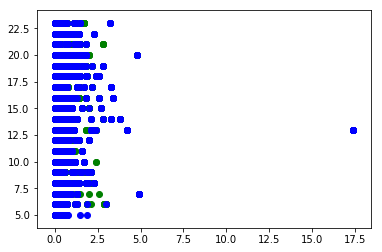

In [127]:
df['late']=df['actualtime_arr_to']>df['plannedtime_arr_to']
plt.scatter(df[df['late']==True]['rain'],df[df['late']==True]['hour'],c='green')
plt.scatter(df[df['late']==False]['rain'],df[df['late']==False]['hour'],c='blue')

plt.show()

# Is there something wrong with our data? The samples completely cover each
# other

In [110]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [120]:
rgr = rfr().fit(train[['mean_travel_time']],train['traveltime'])

In [121]:
preds = rgr.predict(test[['mean_travel_time']])

In [122]:
percentage_errors = (abs(preds - test['traveltime'])/test['traveltime']) * 100

In [123]:
percentage_errors.mean()

32.665999589805615

# With SVC

In [129]:
from sklearn.svm import SVC

In [137]:
clf = SVC().fit(train[features],train['late'])

In [138]:
clf.predict(test[features])

array([False, False, False, ..., False, False, False])

In [139]:
pred = clf.predict(test[features])

In [140]:
accuracy_score(test['late'],pred)

0.5462385641862363

# Rubbish

In [145]:
from sklearn.neural_network import MLPClassifier as NN

['BernoulliRBM',
 'MLPClassifier',
 'MLPRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_stochastic_optimizers',
 'multilayer_perceptron',
 'rbm']

In [146]:
features=['actualtime_arr_from',
        'distance',
       'day', 'month', 'hour', 'year', 'dewpt', 'msl', 'rain', 'rhum', 'temp',
       'vappr', 'wetb', 'mean_travel_time', 'weekend']

In [148]:
clf=NN(hidden_layer_sizes=(16,32,64,128,64,32,16)).fit(train[features],train['late'])

In [149]:
preds = clf.predict(test[features])

In [151]:
accuracy_score(test['late'],preds)

0.5485111590233669

In [161]:
from sklearn.decomposition import PCA

In [162]:
X=PCA(n_components = 10).fit(df[features])

In [164]:
X.singular_values_

array([3.61158165e+06, 3.41431662e+03, 2.53904642e+03, 1.94213227e+03,
       1.57279664e+03, 3.92983999e+02, 2.04857936e+02, 9.64397000e+01,
       8.91122230e+01, 8.66778214e+01])